In [45]:
import csv
import lightkurve as lk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np
import astropy.units as u
from astropy.modeling.models import Sine1D
from sklearn.linear_model import LinearRegression
import pandas as pd
from astropy.modeling import models, fitting
from lightkurve.correctors import PLDCorrector
import lmfit
from astropy.timeseries import LombScargle

In [4]:
# Define dataframes
df = pd.read_csv('query_data/comma_test_query.csv')
all_df = df[['iau_name', 'i', 'porb', 'porbe']]

# Dataframe with orbital period calculations
porb_df = all_df[all_df['porb'] != 0].reset_index()
# Dataframe without orbital period calculations
no_porb_df = all_df[all_df['porb'] == 0].reset_index()

index                             4
iau_name    SDSSJ002157.90-110331.6
i                           17.0707
porb                            0.0
porbe                           0.0
Name: 4, dtype: object 

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 70 2023   SPOC     120    37774360      0.0 



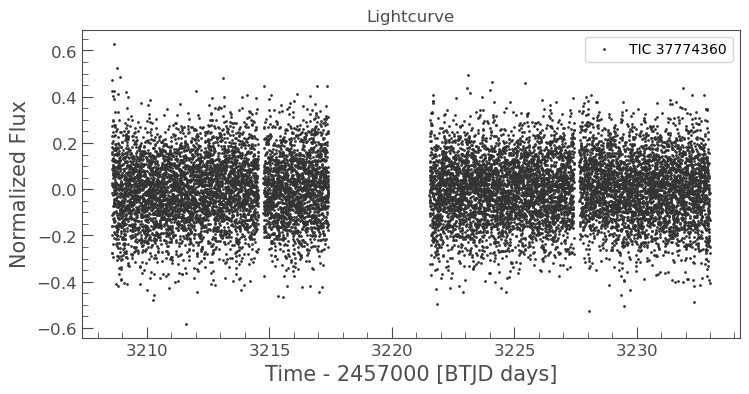

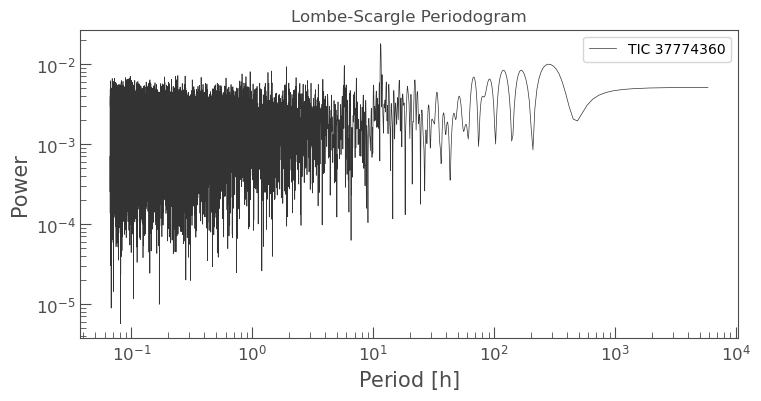

In [56]:
# Pull lightcurve data for that star
star_info = no_porb_df.iloc[4]
star_result = lk.search_lightcurve(star_info['iau_name'], mission = 'TESS')
print(star_info, '\n')
print(star_result, '\n')

# Get lightcurve data -> MAKE ME SO SELECTS ROW WITH LOWEST CADENCE
star_lightcurve = star_result[0].download().remove_nans().remove_outliers().normalize() - 1
time = star_lightcurve.time.value
flux = star_lightcurve.flux - star_lightcurve.flux_err
flux_lower_err = star_lightcurve.flux - star_lightcurve.flux_err
flux_upper_err = star_lightcurve.flux + star_lightcurve.flux_err

# Plot lightcurve
star_lightcurve.scatter()
plt.title('Lightcurve')
plt.legend()
plt.show()

# Periodogram bounds
min_period = (2*star_result[0].exptime.value) / (60*60) * u.hr
max_period = 14*24 * u.hr

# Plot periodogram
star_periodogram = star_lightcurve.to_periodogram(oversample_factor = 10, minimum_period = min_period)
star_periodogram.plot(view = 'period', scale = 'log', unit = u.hr)
plt.title('Lombe-Scargle Periodogram')
plt.legend()
plt.show()

In [ ]:
# Calculate the false alaem 